In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-wellness-tracker/DWT Data.xlsx.csv


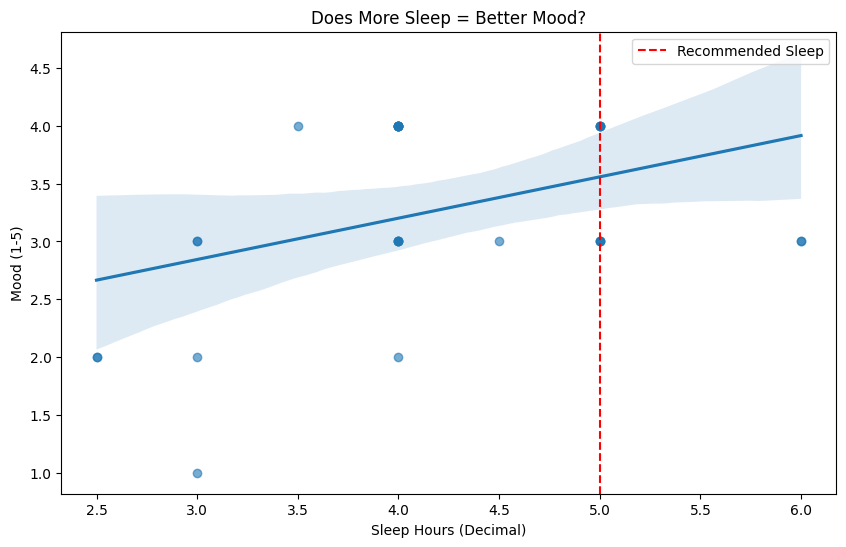

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your cleaned data
file_path = '/kaggle/input/daily-wellness-tracker/DWT Data.xlsx.csv'
df = pd.read_csv(file_path)  

# Scatter plot: Sleep vs. Mood
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep Hours', y='Mood (1-5)', data=df, scatter_kws={'alpha':0.6})
plt.title("Does More Sleep = Better Mood?")
plt.xlabel("Sleep Hours (Decimal)")
plt.ylabel("Mood (1-5)")
plt.axvline(x=5, color='red', linestyle='--', label="Recommended Sleep")
plt.legend()
plt.show()

In [3]:
df.columns

Index(['State Code', 'Date', 'Sleep Hours', 'Mood (1-5)', 'Productivity (1-5)',
       'Steps Taken', 'Notes'],
      dtype='object')

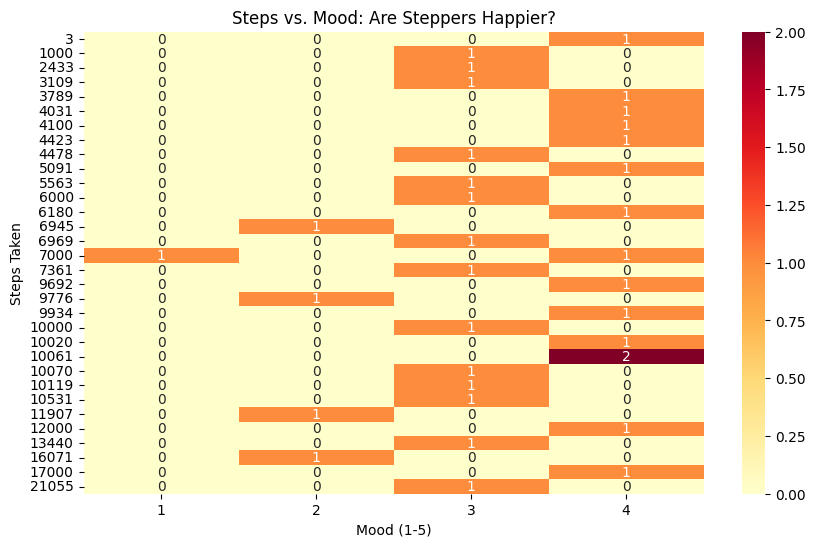

In [4]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Steps Taken', columns='Mood (1-5)', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Steps vs. Mood: Are Steppers Happier?")
plt.show()

Text(3.5, 20000, '21k steps, mood=3')

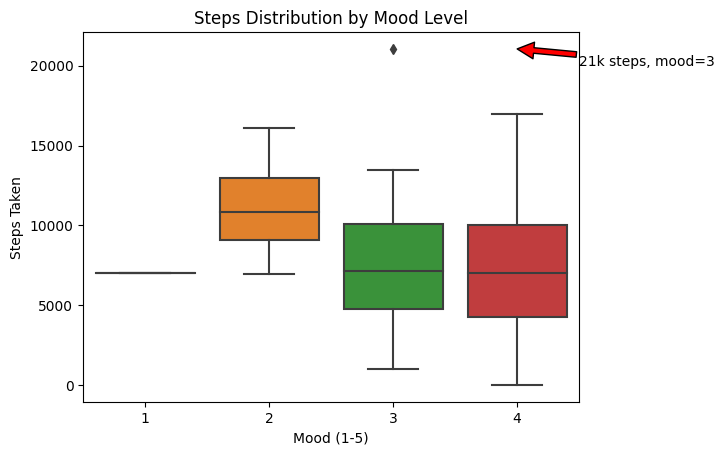

In [5]:
sns.boxplot(x='Mood (1-5)', y='Steps Taken', data=df)
plt.title("Steps Distribution by Mood Level")
plt.annotate("21k steps, mood=3", xy=(3, 21055), xytext=(3.5, 20000), 
             arrowprops=dict(facecolor='red'))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/378758431.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plt.axvspan(pd.to_datetime('22/06/2025'), pd.to_datetime('24/06/2025'),


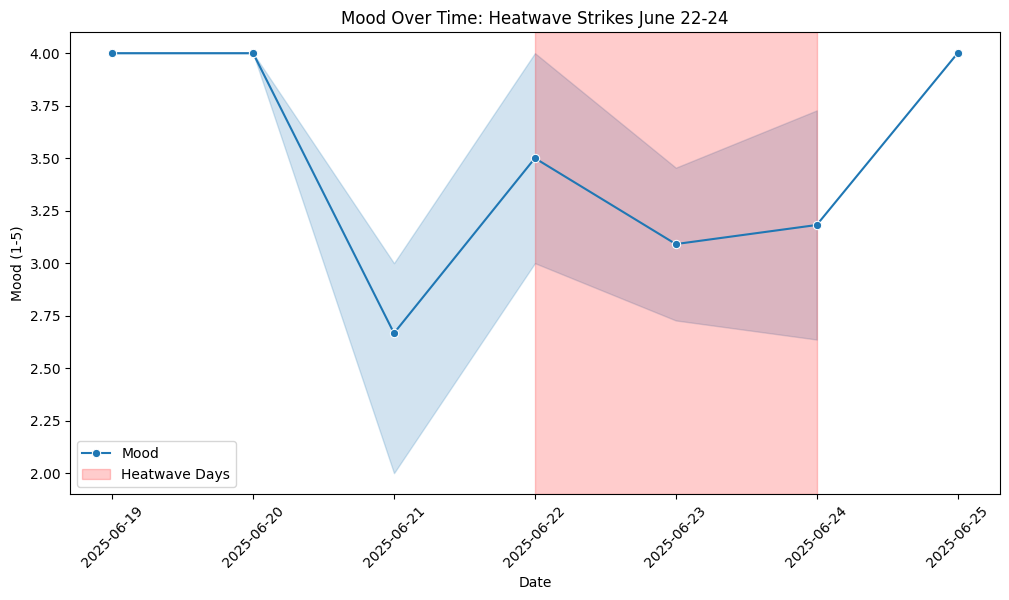

In [6]:
# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Mood (1-5)', data=df, marker='o', label='Mood')
plt.xticks(rotation=45)
plt.title("Mood Over Time: Heatwave Strikes June 22-24")
plt.axvspan(pd.to_datetime('22/06/2025'), pd.to_datetime('24/06/2025'), 
            color='red', alpha=0.2, label='Heatwave Days')
plt.legend()
plt.show()

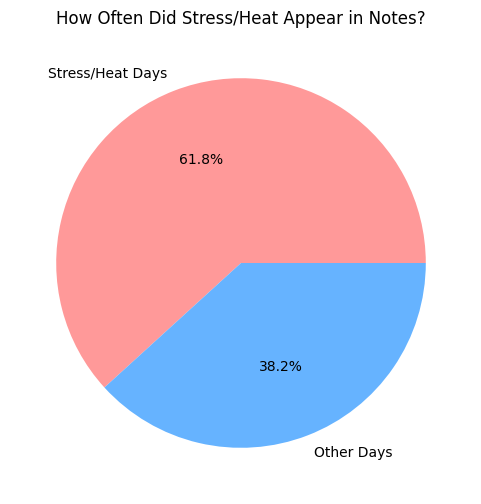

In [7]:
# Count stress/heat mentions
stress_count = df['Notes'].str.contains('stress|heat', case=False).sum()
other_count = len(df) - stress_count

plt.figure(figsize=(6, 6))
plt.pie([stress_count, other_count], labels=['Stress/Heat Days', 'Other Days'], 
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("How Often Did Stress/Heat Appear in Notes?")
plt.show()

In [8]:
missing_prod = df[df['Productivity (1-5)'].isna()]
print(f"People with missing productivity: {len(missing_prod)}")
print(missing_prod['Notes'].value_counts())

People with missing productivity: 1
Notes
water allergy,sun and heat    1
Name: count, dtype: int64


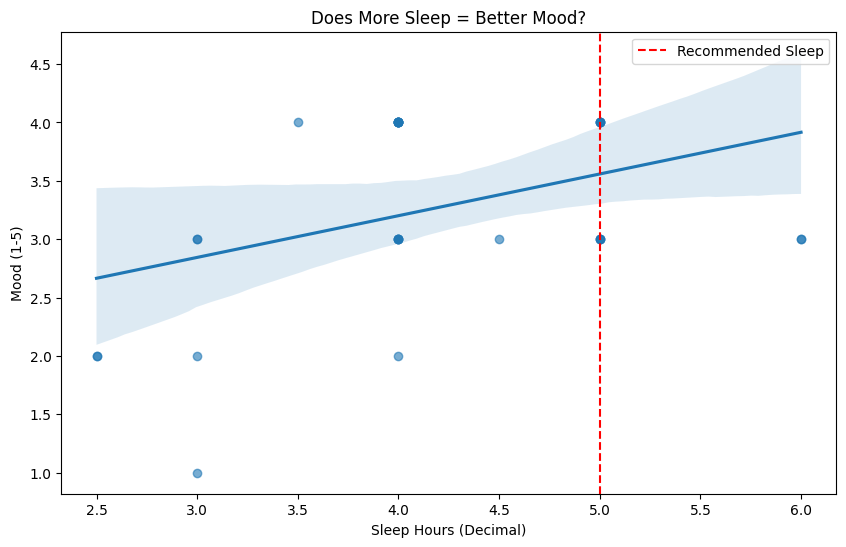

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your cleaned data
file_path = '/kaggle/input/daily-wellness-tracker/DWT Data.xlsx.csv'
df = pd.read_csv(file_path)  

# Scatter plot: Sleep vs. Mood
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep Hours', y='Mood (1-5)', data=df, scatter_kws={'alpha':0.6})
plt.title("Does More Sleep = Better Mood?")
plt.xlabel("Sleep Hours (Decimal)")
plt.ylabel("Mood (1-5)")
plt.axvline(x=5, color='red', linestyle='--', label="Recommended Sleep")
plt.legend()
plt.show()